In [1]:
import pickle
import pandas as pd
import numpy as np
import sys
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
from model_files.nerm import model as model
#####
## dataframe(s) you use should look like this (except with your own parameter names as the column names of course):
##
## >>> post_params
##        division_A_baseline  division_A_altered  ...  diff_A2_to_A_baseline  diff_Y_to_A2_baseline  diff_Y_to_A_baseline
## 0                -0.395628            0.898909  ...                    NaN                    NaN                   NaN
## 1                -0.328036            0.604370  ...                    NaN                    NaN                   NaN
## 2                -0.327190            0.466817  ...                    NaN                    NaN                   NaN
## 3                -0.327190            0.466817  ...                    NaN                    NaN                   NaN
## 4                -0.365124            0.814785  ...                    NaN                    NaN                   NaN
## ...                    ...                 ...  ...                    ...                    ...                   ...
## 38995            -0.317999                 NaN  ...                    NaN               0.997874             -0.853774
## 38996            -0.335368                 NaN  ...                    NaN              -0.325911              0.325382
## 38997            -0.341896                 NaN  ...                    NaN               0.240824             -1.360089
## 38998            -0.336413                 NaN  ...                    NaN               0.561483              0.499492
## 38999            -0.326315                 NaN  ...                    NaN               1.383033             -0.107695
## 
## [2525030 rows x 53 columns]
## 
##
## for this code i had the dataframes saved as a pickle file (using pandas' df.to_pickle('filename.pickle') function)
## which is why i have 'filenamedict' and using pd.read_pickle() to set post_params, 
## but you could just have post_params set up as above and remove lines about reading it in from file
## 
#####

rules: 25
reactions: 40
species: 37
parameters: 54
rate constants: 40

ComponentSet([
 Parameter('TNF_0', 2326.0),
 Parameter('TNFR_0', 4800.0),
 Parameter('TRADD_0', 4696.0),
 Parameter('RIP1_0', 40000.0),
 Parameter('TRAF_0', 11776.0),
 Parameter('cIAP_0', 9000.0),
 Parameter('A20_0', 9000.0),
 Parameter('CYLD_0', 9000.0),
 Parameter('FADD_0', 3109.0),
 Parameter('flip_L_0', 3900.0),
 Parameter('Lubac_0', 7226.0),
 Parameter('C8_0', 3799.0),
 Parameter('RIP3_0', 10654.0),
 Parameter('MLKLa_0', 5544.0),
 Parameter('p1f', 1e-06),
 Parameter('p1r', 0.001),
 Parameter('p2f', 0.001),
 Parameter('p3f', 1e-06),
 Parameter('p3r', 0.001),
 Parameter('p4f', 1e-06),
 Parameter('p4r', 0.001),
 Parameter('p5f', 1e-06),
 Parameter('p5r', 0.001),
 Parameter('p6f', 1e-06),
 Parameter('p6r', 0.001),
 Parameter('p7f', 0.1),
 Parameter('p8f', 1e-06),
 Parameter('p8r', 0.001),
 Parameter('p9f', 1e-06),
 Parameter('p9r', 0.001),
 Parameter('p10f', 0.1),
 Parameter('p11f', 1e-06),
 Parameter('p11r', 0.001

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

In [2]:
mode1_100 = np.load('param_files/necro_pars10k_cluster1_5720_mod.npy')[:, 14:]
mode2_100 = np.load('param_files/necro_pars10k_cluster2_5720_mod.npy')[:, 14:]
mode3_100 = np.load('param_files/necro_pars10k_cluster3_5720_mod.npy')[:, 14:]
mode4_100 = np.load('param_files/necro_pars10k_cluster4_5720_mod.npy')[:, 14:]

In [ ]:
clus0_100 = np.load('param_files/necro_pars10k_cluster1_5720.npy')[:, 14:]
clus1_100 = np.load('param_files/necro_pars10k_cluster2_5720.npy')[:, 14:]
clus2_100 = np.load('param_files/necro_pars10k_cluster3_5720.npy')[:, 14:]
clus3_100 = np.load('param_files/necro_pars10k_cluster4_5720.npy')[:, 14:]

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
n = 50000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clus0_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode1',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(mode1_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode1mod',hist_kws=dict(edgecolor="indianred", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus2mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="orange", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus3mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
n = 50000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clus1_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode2',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(mode2_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode2mod',hist_kws=dict(edgecolor="indianred", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus2mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="orange", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus3mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
n = 50000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clus2_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode3',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(mode3_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode3mod',hist_kws=dict(edgecolor="indianred", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus2mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="orange", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus3mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
n = 50000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clus3_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode4',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(mode4_100[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'mode4mod',hist_kws=dict(edgecolor="indianred", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus2mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="orange", linewidth=2, alpha = 0.5))
#     sns.distplot(np.log10(clus3mod[:][:, counter]), hist=True, rug=False,bins = 10,
#                  label = 'posterior',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
# cI_kf_tradd (R4)
# I_kr_traf2 (R8)
# cI_kf_a20 (R15)
# Ia20_kf_cII (R17)
# cIcyld_kf_cII (R20)
# cII_kf_c8a (R27)
# cII_kr_c8a (R28)
# cIIr3_kf_c8flr1trc (R32)
# cII_kf_mlkl (R38)

In [94]:
a = mode1_100[:, 3]
mode1_varpars.shape

(32796,)

In [166]:
three1 = mode1_100[:, 3]
seven1 = mode1_100[:, 6]
fourteen1 = mode1_100[:, 14]
sixteen1 = mode1_100[:, 16]
nineteen1 = mode1_100[:, 19]
twentysix1 = mode1_100[:, 26]
twentyseven1 = mode1_100[:, 27]
thirtyone1 = mode1_100[:, 31]
thirtyseven1 = mode1_100[:, 37]
mode1_varpars1 = np.stack([three1, fourteen1, sixteen1, nineteen1, twentysix1, twentyseven1,
                               thirtyone1, thirtyseven1], axis = -1)

In [167]:
dfm1_9 = pd.DataFrame(np.log10(mode1_varpars1), columns = ['p4', 'p15', 
                    'p17', 'p20', 'p27', 'p28', 'p32', 'p38'])
dfm1_9.to_pickle('param_files/mode1mod_varpars9.pickle')

In [168]:
three2 = mode2_100[:, 3]
seven2 = mode2_100[:, 6]
fourteen2 = mode2_100[:, 14]
sixteen2 = mode2_100[:, 16]
nineteen2 = mode2_100[:, 19]
twentysix2 = mode2_100[:, 26]
twentyseven2 = mode2_100[:, 27]
thirtyone2 = mode2_100[:, 31]
thirtyseven2 = mode2_100[:, 37]
mode1_varpars2 = np.stack([three2, fourteen2, sixteen2, nineteen2, twentysix2, twentyseven2,
                               thirtyone2, thirtyseven2], axis = -1)

In [169]:
dfm2_9 = pd.DataFrame(np.log10(mode1_varpars2), columns = ['p4', 'p15', 
                    'p17', 'p20', 'p27', 'p28', 'p32', 'p38'])
dfm2_9.to_pickle('param_files/mode2mod_varpars9.pickle')

In [170]:
three3 = mode3_100[:, 3]
seven3 = mode3_100[:, 6]
fourteen3 = mode3_100[:, 14]
sixteen3 = mode3_100[:, 16]
nineteen3 = mode3_100[:, 19]
twentysix3 = mode3_100[:, 26]
twentyseven3 = mode3_100[:, 27]
thirtyone3 = mode3_100[:, 31]
thirtyseven3 = mode3_100[:, 37]
mode1_varpars3 = np.stack([three3, fourteen3, sixteen3, nineteen3, twentysix3, twentyseven3,
                               thirtyone3, thirtyseven3], axis = -1)
print(three3)

[3.20520940e-04 1.97212003e-02 6.31343745e-08 ... 2.54198308e-04
 2.18734274e-04 5.12094561e-05]


In [171]:
dfm3_9 = pd.DataFrame(np.log10(mode1_varpars3), columns = ['p4', 'p15', 
                    'p17', 'p20', 'p27', 'p28', 'p32', 'p38'])
dfm3_9.to_pickle('param_files/mode3mod_varpars9.pickle')

In [172]:
three4 = mode4_100[:, 3]
seven4 = mode4_100[:, 6]
fourteen4 = mode4_100[:, 14]
sixteen4 = mode4_100[:, 16]
nineteen4 = mode4_100[:, 19]
twentysix4 = mode4_100[:, 26]
twentyseven4 = mode4_100[:, 27]
thirtyone4 = mode4_100[:, 31]
thirtyseven4 = mode4_100[:, 37]
mode1_varpars4 = np.stack([three4, fourteen4, sixteen4, nineteen4, twentysix4, twentyseven4,
                               thirtyone4, thirtyseven4], axis = -1)
print(three4)

[2.17096536e-04 5.16953447e-04 9.48343276e-04 ... 2.40985543e-03
 1.51125481e-04 9.36103279e-06]


In [173]:
dfm4_9 = pd.DataFrame(np.log10(mode1_varpars4), columns = ['p4', 'p15', 
                    'p17', 'p20', 'p27', 'p28', 'p32', 'p38'])
dfm4_9.to_pickle('param_files/mode4mod_varpars9.pickle')

In [174]:
# filename for each dataset i'm comparing, keyed on that dataset's name
# obviously don't need this if you're not comparing between datasets or other conditions
filenamedict = {
    'Mode1':'param_files/mode1mod_varpars9.pickle',
    'Mode2':'param_files/mode2mod_varpars9.pickle',
    'Mode3':'param_files/mode3mod_varpars9.pickle',
    'Mode4':'param_files/mode4mod_varpars9.pickle'
}

parameter_names = ['p4', 'p15', 
                    'p17', 'p20', 'p27', 'p28', 'p32', 'p38']
#your parameter names that you want to make the figure with
# for example i had 44 parameters and only wanted to show a subset so i only included a subset here

# totboxdf and the for loop are for if you have different fitting results you're comparing (i had 3 different fitting results from 3 different datasets)
# can remove the for loop or just put one dataset in it as necessary; won't need totboxdf in that case either

totboxdf = pd.DataFrame()   # totboxdf will include all posterior parameters for all datasets
boxdf = pd.DataFrame()      # boxdf is built per dataset
dictfordf = {}
for resdir in ['Mode1','Mode2','Mode3','Mode4']:
    dictfordf[resdir] = {}
    filename = filenamedict[resdir] 
    post_params = pd.read_pickle(filename)
    for n, i in enumerate(parameter_names):  # go through the parameters you're interested in
        try:
            if np.isnan(post_params[i]).all():
                continue
            post_params[i][post_params[i] == np.inf] = np.nan
            post_params[i][post_params[i] == -np.inf] = np.nan
            # below is what i used which i leave in for completeness, but line 64 should work for most purposes
            #k = gaussian_kde(post_params.loc[~np.isnan(post_params[i])][i],
            #                weights=post_params.loc[~np.isnan(post_params[i])].model_pp_per_subtypemakeup)
            #dictfordf[resdir][i] = list(k.resample(1000)[0])
            dictfordf[resdir][i] = post_params[i]   # without the distribution you can just use all your parameters
        except KeyError:
            print('problem',n,i) # if the posterior parameter df from the file doesn't include one/more of the parameters you're interested in
            pass
    dictfordf[resdir]['dataset'] = resdir                       # associate all the parameters with the correct dataset
    boxdf = pd.DataFrame(dictfordf[resdir])
    totboxdf = pd.concat([totboxdf,boxdf],ignore_index=True)    # put the dataframe just made (dataset-specific) below other dataframe(s) put together
    boxdf = pd.DataFrame()

# this puts the df in the format sns.boxplot() is expecting
dfvar = pd.melt(totboxdf,id_vars=['dataset'],value_vars=[x for x in totboxdf.columns if not x=='dataset'])

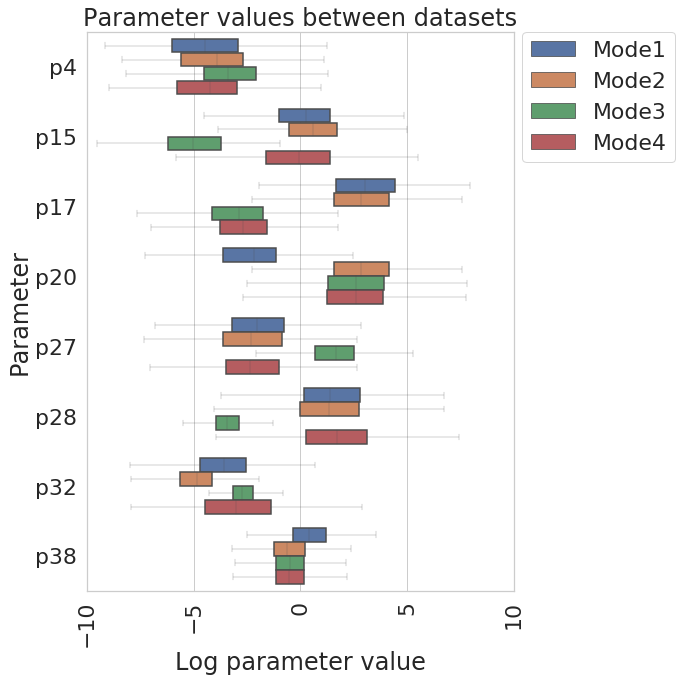

In [176]:
sns.set_style("whitegrid") 
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(10, 10))
g = sns.boxplot(y='variable',x='value',hue='dataset',data=dfvar,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)
# sns.set(font_scale = 2)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
# g.set_yticklabels(g.get_yticks(), size = 15)
# g.set_xticklabels(g.get_yticks(), size = 15)
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Log parameter value')
plt.ylabel('Parameter')
plt.xlim(xmin = -10, xmax = 10)
plt.tight_layout()
plt.savefig('allmodes_8varpars_boxplot_fittedparams.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [35]:
my_array220 = mode2_100[:, :20]

dfm220 = pd.DataFrame(np.log10(mode1_varpars), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm220.to_pickle('param_files/df20_mode2mod_names.pickle')

In [36]:
my_arra3120 = mode3_100[:, :20]

dfm320 = pd.DataFrame(np.log10(my_array320), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm320.to_pickle('param_files/df20_mode3mod_names.pickle')

In [37]:
my_array420 = mode4_100[:, :20]

dfm420 = pd.DataFrame(np.log10(my_array420), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm420.to_pickle('param_files/df20_mode4mod_names.pickle')

In [153]:
# filename for each dataset i'm comparing, keyed on that dataset's name
# obviously don't need this if you're not comparing between datasets or other conditions
filenamedict = {
    'Mode1':'param_files/df20_mode1mod_names.pickle',
    'Mode2':'param_files/df20_mode2mod_names.pickle',
    'Mode3':'param_files/df20_mode3mod_names.pickle',
    'Mode4':'param_files/df20_mode4mod_names.pickle'
}

parameter_names = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 'cI_kf_tradd', 'cI_kr_tradd', 'cI_kf_rip1', 'cI_kr_rip1', 
                   'cI_kf_traf2', 'cI_kr_traf2', 'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld','cI_kr_cyld', 'cIcyld_kf_cII']
#your parameter names that you want to make the figure with
# for example i had 44 parameters and only wanted to show a subset so i only included a subset here

# totboxdf and the for loop are for if you have different fitting results you're comparing (i had 3 different fitting results from 3 different datasets)
# can remove the for loop or just put one dataset in it as necessary; won't need totboxdf in that case either

totboxdf = pd.DataFrame()   # totboxdf will include all posterior parameters for all datasets
boxdf = pd.DataFrame()      # boxdf is built per dataset
dictfordf = {}
for resdir in ['Mode1','Mode2','Mode3','Mode4']:
    dictfordf[resdir] = {}
    filename = filenamedict[resdir] 
    post_params = pd.read_pickle(filename)
    for n, i in enumerate(parameter_names):  # go through the parameters you're interested in
        try:
            if np.isnan(post_params[i]).all():
                continue
            post_params[i][post_params[i] == np.inf] = np.nan
            post_params[i][post_params[i] == -np.inf] = np.nan
            # below is what i used which i leave in for completeness, but line 64 should work for most purposes
            #k = gaussian_kde(post_params.loc[~np.isnan(post_params[i])][i],
            #                weights=post_params.loc[~np.isnan(post_params[i])].model_pp_per_subtypemakeup)
            #dictfordf[resdir][i] = list(k.resample(1000)[0])
            dictfordf[resdir][i] = post_params[i]   # without the distribution you can just use all your parameters
        except KeyError:
            print('problem',n,i) # if the posterior parameter df from the file doesn't include one/more of the parameters you're interested in
            pass
    dictfordf[resdir]['dataset'] = resdir                       # associate all the parameters with the correct dataset
    boxdf = pd.DataFrame(dictfordf[resdir])
    totboxdf = pd.concat([totboxdf,boxdf],ignore_index=True)    # put the dataframe just made (dataset-specific) below other dataframe(s) put together
    boxdf = pd.DataFrame()

# this puts the df in the format sns.boxplot() is expecting
df20 = pd.melt(totboxdf,id_vars=['dataset'],value_vars=[x for x in totboxdf.columns if not x=='dataset'])

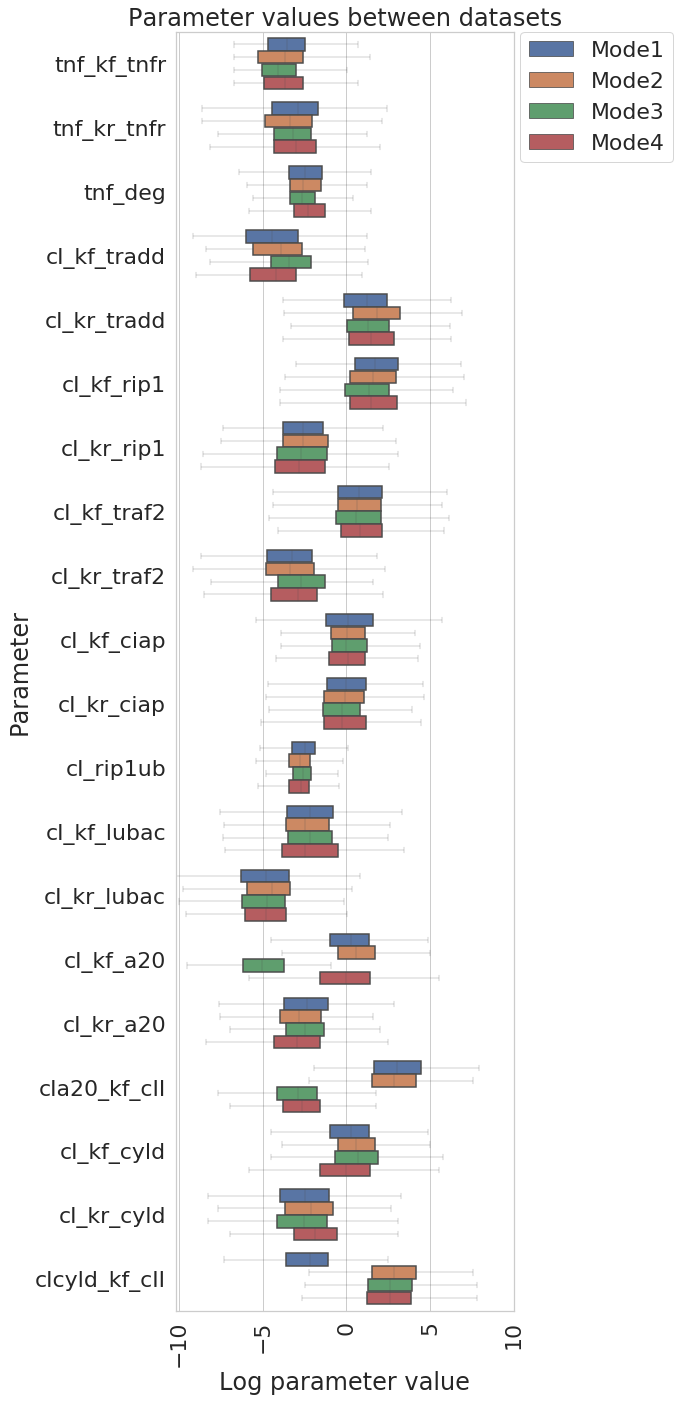

In [154]:
sns.set_style("whitegrid") 
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(10, 20))
g = sns.boxplot(y='variable',x='value',hue='dataset',data=df20,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)
# sns.set(font_scale = 2)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
# g.set_yticklabels(g.get_yticks(), size = 15)
# g.set_xticklabels(g.get_yticks(), size = 15)
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Log parameter value')
plt.ylabel('Parameter')
plt.xlim(xmin = -10.2, xmax = 10)
plt.tight_layout()
# plt.savefig('mode1_first20pars_boxplot_fittedparams.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

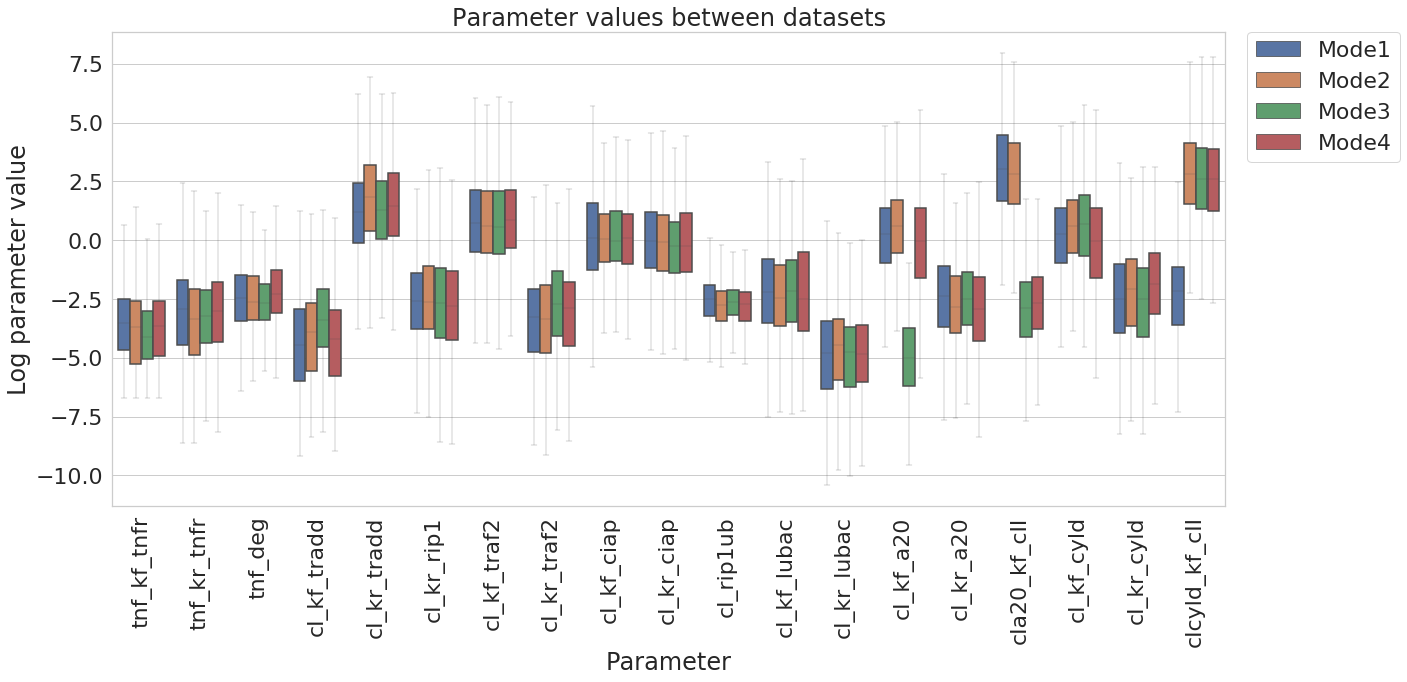

In [70]:
sns.set_style("whitegrid") 
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(20,10))
g = sns.boxplot(x='variable',y='value',hue='dataset',data=df20,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)
# sns.set(font_scale = 2)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
# g.set_yticklabels(g.get_yticks(), size = 15)
# g.set_xticklabels(g.get_yticks(), size = 15)
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Parameter')
plt.ylabel('Log parameter value')
# plt.xlim(xmin = -10.2, xmax = 10)
plt.tight_layout()
plt.savefig('mode1_first20pars_boxplot_fittedparams_rot.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
#['p1f','p1r','p2f', 'p3f', 'p3r', 'p4f', 'p4r', 'p5f', 'p5r', 'p6f', 'p6r', 'p7f', 'p8f', 'p8r', 'p9f', 'p9r', 'p10f', 'p11f', 
                                      #'p11r', 'p12f']

In [29]:
my_array120 = mode1_100[:, :20]

dfm120 = pd.DataFrame(np.log10(my_array120), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kr_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm120.to_pickle('param_files/df20_mode1mod.pickle')

In [30]:
my_array220 = mode2_100[:, :20]

dfm220 = pd.DataFrame(np.log10(my_array220), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kr_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm220.to_pickle('param_files/df20_mode2mod.pickle')

In [31]:
my_array320 = mode3_100[:, :20]

dfm320 = pd.DataFrame(np.log10(my_array320), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kr_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm320.to_pickle('param_files/df20_mode3mod.pickle')

In [32]:
my_array420 = mode4_100[:, :20]

dfm420 = pd.DataFrame(np.log10(my_array420), columns = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kr_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII'])
dfm420.to_pickle('param_files/df20_mode4mod.pickle')

In [33]:
# filename for each dataset i'm comparing, keyed on that dataset's name
# obviously don't need this if you're not comparing between datasets or other conditions
filenamedict = {
    'Mode1':'param_files/df20_mode1mod.pickle',
    'Mode2':'param_files/df20_mode2mod.pickle',
    'Mode3':'param_files/df20_mode3mod.pickle',
    'Mode4':'param_files/df20_mode4mod.pickle'
}

parameter_names = ['tnf_kf_tnfr','tnf_kr_tnfr','tnf_deg', 
                                                        'cI_kf_tradd', 'cI_kr_tradd', 'cI_kr_rip1', 'cI_kr_rip1', 
                                                        'cI_kf_traf2', 'cI_kr_traf2', 
                                      'cI_kf_ciap', 'cI_kr_ciap', 'cI_rip1ub', 'cI_kf_lubac', 'cI_kr_lubac', 
                                    'cI_kf_a20', 'cI_kr_a20', 'cIa20_kf_cII', 'cI_kf_cyld', 
                                      'cI_kr_cyld', 'cIcyld_kf_cII']
#your parameter names that you want to make the figure with
# for example i had 44 parameters and only wanted to show a subset so i only included a subset here

# totboxdf and the for loop are for if you have different fitting results you're comparing (i had 3 different fitting results from 3 different datasets)
# can remove the for loop or just put one dataset in it as necessary; won't need totboxdf in that case either

totboxdf = pd.DataFrame()   # totboxdf will include all posterior parameters for all datasets
boxdf = pd.DataFrame()      # boxdf is built per dataset
dictfordf = {}
for resdir in ['Mode1','Mode2','Mode3','Mode4']:
    dictfordf[resdir] = {}
    filename = filenamedict[resdir] 
    post_params = pd.read_pickle(filename)
    for n, i in enumerate(parameter_names):  # go through the parameters you're interested in
        try:
            if np.isnan(post_params[i]).all():
                continue
            post_params[i][post_params[i] == np.inf] = np.nan
            post_params[i][post_params[i] == -np.inf] = np.nan
            # below is what i used which i leave in for completeness, but line 64 should work for most purposes
            #k = gaussian_kde(post_params.loc[~np.isnan(post_params[i])][i],
            #                weights=post_params.loc[~np.isnan(post_params[i])].model_pp_per_subtypemakeup)
            #dictfordf[resdir][i] = list(k.resample(1000)[0])
            dictfordf[resdir][i] = post_params[i]   # without the distribution you can just use all your parameters
        except KeyError:
            print('problem',n,i) # if the posterior parameter df from the file doesn't include one/more of the parameters you're interested in
            pass
    dictfordf[resdir]['dataset'] = resdir                       # associate all the parameters with the correct dataset
    boxdf = pd.DataFrame(dictfordf[resdir])
    totboxdf = pd.concat([totboxdf,boxdf],ignore_index=True)    # put the dataframe just made (dataset-specific) below other dataframe(s) put together
    boxdf = pd.DataFrame()

# this puts the df in the format sns.boxplot() is expecting
df20 = pd.melt(totboxdf,id_vars=['dataset'],value_vars=[x for x in totboxdf.columns if not x=='dataset'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

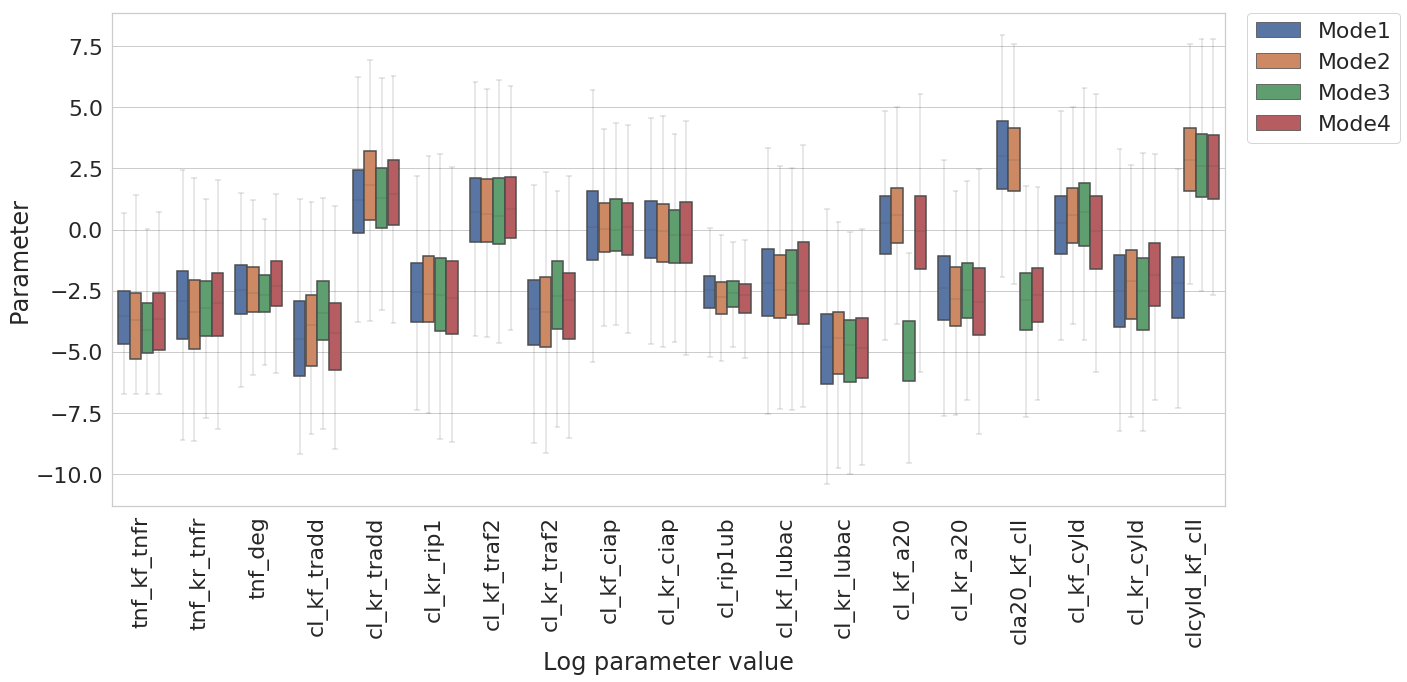

In [73]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(20,10))
g = sns.boxplot(x='variable',y='value',hue='dataset',data=df20,palette='deep', showfliers=False) #,flierprops = dict(markerfacecolor = '0.50', markersize = 2))

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels(), rotation=90)
# plt.title('Parameter values between datasets')
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Log parameter value')
plt.ylabel('Parameter')
# plt.xlim(xmin = -10.2, xmax = 10)
plt.tight_layout()
plt.savefig('modes_last20pars_boxplot_fittedparams_rot.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
# ['p13f', 'p13r', 'p14f', 'p14r', 'p15f', 'p15r', 
#                                       'p16f', 'p16r', 'p17f', 'p18f', 'p18r', 'p19f', 'p20f', 'p20r', 
#                                       'p21f', 'p22f', 'p23f', 'p24f', 'p24r', 'p25f']

In [45]:
my_array140 = mode1_100[:, 20:]

dfm140 = pd.DataFrame(np.log10(my_array140), columns = ['cII_kf_fadd', 'cII_kr_fadd', 'cII_kf_c8i', 'cII_kr_c8i',
                                                        'cII_kf_flip', 'cII_kr_flip', 
                                      'cII_kf_c8a', 'cII_kr_c8a', 'cIIc8fl_kf_r1trc', 'cIIr3_kf_c8fl', 'cIIr3_kr_c8fl', 
                                                        'cIIr3_kf_c8flr1trc', 'cII_kf_r3', 'cII_kr_r3', 
                                      'cII_kf_r1r3', 'cII_kf_r1r3p', 'cII_kf_r1pr3p', 'cII_kf_mlkl', 'cII_kr_mlkl',
                                                        'cII_kf_pmlkl'])
dfm140.to_pickle('df40_mode1.pickle')

In [46]:
my_array140 = mode2_100[:, 20:]

dfm140 = pd.DataFrame(np.log10(my_array140), columns = ['cII_kf_fadd', 'cII_kr_fadd', 'cII_kf_c8i', 'cII_kr_c8i',
                                                        'cII_kf_flip', 'cII_kr_flip', 
                                      'cII_kf_c8a', 'cII_kr_c8a', 'cIIc8fl_kf_r1trc', 'cIIr3_kf_c8fl', 'cIIr3_kr_c8fl', 
                                                        'cIIr3_kf_c8flr1trc', 'cII_kf_r3', 'cII_kr_r3', 
                                      'cII_kf_r1r3', 'cII_kf_r1r3p', 'cII_kf_r1pr3p', 'cII_kf_mlkl', 'cII_kr_mlkl',
                                                        'cII_kf_pmlkl'])
dfm140.to_pickle('df40_mode2.pickle')

In [47]:
my_array140 = mode3_100[:, 20:]

dfm140 = pd.DataFrame(np.log10(my_array140), columns = ['cII_kf_fadd', 'cII_kr_fadd', 'cII_kf_c8i', 'cII_kr_c8i',
                                                        'cII_kf_flip', 'cII_kr_flip', 
                                      'cII_kf_c8a', 'cII_kr_c8a', 'cIIc8fl_kf_r1trc', 'cIIr3_kf_c8fl', 'cIIr3_kr_c8fl', 
                                                        'cIIr3_kf_c8flr1trc', 'cII_kf_r3', 'cII_kr_r3', 
                                      'cII_kf_r1r3', 'cII_kf_r1r3p', 'cII_kf_r1pr3p', 'cII_kf_mlkl', 'cII_kr_mlkl',
                                                        'cII_kf_pmlkl'])
dfm140.to_pickle('df40_mode3.pickle')

In [48]:
my_array140 = mode4_100[:, 20:]

dfm140 = pd.DataFrame(np.log10(my_array140), columns = ['cII_kf_fadd', 'cII_kr_fadd', 'cII_kf_c8i', 'cII_kr_c8i',
                                                        'cII_kf_flip', 'cII_kr_flip', 
                                      'cII_kf_c8a', 'cII_kr_c8a', 'cIIc8fl_kf_r1trc', 'cIIr3_kf_c8fl', 'cIIr3_kr_c8fl', 
                                                        'cIIr3_kf_c8flr1trc', 'cII_kf_r3', 'cII_kr_r3', 
                                      'cII_kf_r1r3', 'cII_kf_r1r3p', 'cII_kf_r1pr3p', 'cII_kf_mlkl', 'cII_kr_mlkl',
                                                        'cII_kf_pmlkl'])
dfm140.to_pickle('df40_mode4.pickle')

In [49]:
# filename for each dataset i'm comparing, keyed on that dataset's name
# obviously don't need this if you're not comparing between datasets or other conditions
filenamedict = {
    'Mode1':'df40_mode1.pickle',
    'Mode2':'df40_mode2.pickle',
    'Mode3':'df40_mode3.pickle',
    'Mode4':'df40_mode4.pickle'
}

parameter_names = ['cII_kf_fadd', 'cII_kr_fadd', 'cII_kf_c8i', 'cII_kr_c8i',
                                                        'cII_kf_flip', 'cII_kr_flip', 
                                      'cII_kf_c8a', 'cII_kr_c8a', 'cIIc8fl_kf_r1trc', 'cIIr3_kf_c8fl', 'cIIr3_kr_c8fl', 
                                                        'cIIr3_kf_c8flr1trc', 'cII_kf_r3', 'cII_kr_r3', 
                                      'cII_kf_r1r3', 'cII_kf_r1r3p', 'cII_kf_r1pr3p', 'cII_kf_mlkl', 'cII_kr_mlkl',
                                                        'cII_kf_pmlkl']
#your parameter names that you want to make the figure with
# for example i had 44 parameters and only wanted to show a subset so i only included a subset here

# totboxdf and the for loop are for if you have different fitting results you're comparing (i had 3 different fitting results from 3 different datasets)
# can remove the for loop or just put one dataset in it as necessary; won't need totboxdf in that case either

totboxdf = pd.DataFrame()   # totboxdf will include all posterior parameters for all datasets
boxdf = pd.DataFrame()      # boxdf is built per dataset
dictfordf = {}
for resdir in ['Mode1','Mode2','Mode3','Mode4']:
    dictfordf[resdir] = {}
    filename = filenamedict[resdir] 
    post_params = pd.read_pickle(filename)
    for n, i in enumerate(parameter_names):  # go through the parameters you're interested in
        try:
            if np.isnan(post_params[i]).all():
                continue
            post_params[i][post_params[i] == np.inf] = np.nan
            post_params[i][post_params[i] == -np.inf] = np.nan
            # below is what i used which i leave in for completeness, but line 64 should work for most purposes
            #k = gaussian_kde(post_params.loc[~np.isnan(post_params[i])][i],
            #                weights=post_params.loc[~np.isnan(post_params[i])].model_pp_per_subtypemakeup)
            #dictfordf[resdir][i] = list(k.resample(1000)[0])
            dictfordf[resdir][i] = post_params[i]   # without the distribution you can just use all your parameters
        except KeyError:
            print('problem',n,i) # if the posterior parameter df from the file doesn't include one/more of the parameters you're interested in
            pass
    dictfordf[resdir]['dataset'] = resdir                       # associate all the parameters with the correct dataset
    boxdf = pd.DataFrame(dictfordf[resdir])
    totboxdf = pd.concat([totboxdf,boxdf],ignore_index=True)    # put the dataframe just made (dataset-specific) below other dataframe(s) put together
    boxdf = pd.DataFrame()

# this puts the df in the format sns.boxplot() is expecting
df40 = pd.melt(totboxdf,id_vars=['dataset'],value_vars=[x for x in totboxdf.columns if not x=='dataset'])

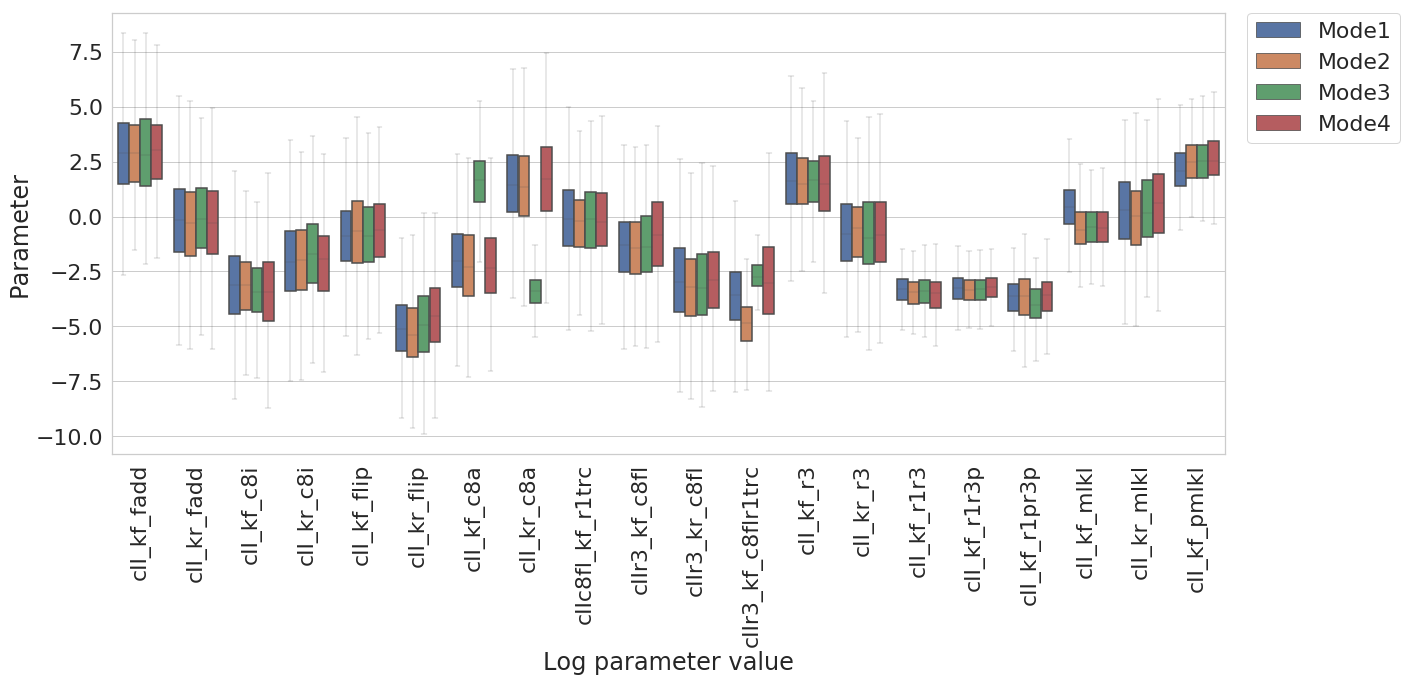

In [77]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(20,10))
g = sns.boxplot(x='variable',y='value',hue='dataset',data=df40,palette='deep', showfliers=False)

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels(), rotation=90)
# plt.title('Parameter values between datasets')
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Log parameter value')
plt.ylabel('Parameter')
plt.tight_layout()
plt.savefig('mode1_df40_boxplot_fittedparams_rot.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
my_array1 = clus0_100

dfm1 = pd.DataFrame(np.log10(my_array1), columns = ['p1f','p1r','p2f', 'p3f', 'p3r', 'p4f', 'p4r', 'p5f', 'p5r', 
                                      'p6f', 'p6r', 'p7f', 'p8f', 'p8r', 'p9f', 'p9r', 'p10f', 'p11f', 
                                      'p11r', 'p12f', 'p13f', 'p13r', 'p14f', 'p14r', 'p15f', 'p15r', 
                                      'p16f', 'p16r', 'p17f', 'p18f', 'p18r', 'p19f', 'p20f', 'p20r', 
                                      'p21f', 'p22f', 'p23f', 'p24f', 'p24r', 'p25f'])
print(dfm1)
dfm1.to_pickle('df_mode1.pickle')

In [ ]:
my_array2 = clus1_100

dfm2 = pd.DataFrame(np.log10(my_array2), columns = ['p1f','p1r','p2f', 'p3f', 'p3r', 'p4f', 'p4r', 'p5f', 'p5r', 
                                      'p6f', 'p6r', 'p7f', 'p8f', 'p8r', 'p9f', 'p9r', 'p10f', 'p11f', 
                                      'p11r', 'p12f', 'p13f', 'p13r', 'p14f', 'p14r', 'p15f', 'p15r', 
                                      'p16f', 'p16r', 'p17f', 'p18f', 'p18r', 'p19f', 'p20f', 'p20r', 
                                      'p21f', 'p22f', 'p23f', 'p24f', 'p24r', 'p25f'])
dfm2.to_pickle('df_mode2.pickle')

In [ ]:
my_array3 = clus2_100

dfm3 = pd.DataFrame(np.log10(my_array3), columns = ['p1f','p1r','p2f', 'p3f', 'p3r', 'p4f', 'p4r', 'p5f', 'p5r', 
                                      'p6f', 'p6r', 'p7f', 'p8f', 'p8r', 'p9f', 'p9r', 'p10f', 'p11f', 
                                      'p11r', 'p12f', 'p13f', 'p13r', 'p14f', 'p14r', 'p15f', 'p15r', 
                                      'p16f', 'p16r', 'p17f', 'p18f', 'p18r', 'p19f', 'p20f', 'p20r', 
                                      'p21f', 'p22f', 'p23f', 'p24f', 'p24r', 'p25f'])
dfm3.to_pickle('df_mode3.pickle')

In [ ]:
my_array4 = clus3_100

dfm4 = pd.DataFrame(np.log10(my_array4), columns = ['p1f','p1r','p2f', 'p3f', 'p3r', 'p4f', 'p4r', 'p5f', 'p5r', 
                                      'p6f', 'p6r', 'p7f', 'p8f', 'p8r', 'p9f', 'p9r', 'p10f', 'p11f', 
                                      'p11r', 'p12f', 'p13f', 'p13r', 'p14f', 'p14r', 'p15f', 'p15r', 
                                      'p16f', 'p16r', 'p17f', 'p18f', 'p18r', 'p19f', 'p20f', 'p20r', 
                                      'p21f', 'p22f', 'p23f', 'p24f', 'p24r', 'p25f'])
dfm4.to_pickle('df_mode4.pickle')

In [ ]:
# filename for each dataset i'm comparing, keyed on that dataset's name
# obviously don't need this if you're not comparing between datasets or other conditions
filenamedict = {
    'Mode1':'df_mode1.pickle',
    'Mode2':'df_mode2.pickle',
    'Mode3':'df_mode3.pickle',
    'Mode4':'df_mode4.pickle'
}

parameter_names = ['p1f','p1r','p2f', 'p3f', 'p3r', 'p4f', 'p4r', 'p5f', 'p5r', 
                                      'p6f', 'p6r', 'p7f', 'p8f', 'p8r', 'p9f', 'p9r', 'p10f', 'p11f', 
                                      'p11r', 'p12f', 'p13f', 'p13r', 'p14f', 'p14r', 'p15f', 'p15r', 
                                      'p16f', 'p16r', 'p17f', 'p18f', 'p18r', 'p19f', 'p20f', 'p20r', 
                                      'p21f', 'p22f', 'p23f', 'p24f', 'p24r', 'p25f']
#your parameter names that you want to make the figure with
# for example i had 44 parameters and only wanted to show a subset so i only included a subset here

# totboxdf and the for loop are for if you have different fitting results you're comparing (i had 3 different fitting results from 3 different datasets)
# can remove the for loop or just put one dataset in it as necessary; won't need totboxdf in that case either

totboxdf = pd.DataFrame()   # totboxdf will include all posterior parameters for all datasets
boxdf = pd.DataFrame()      # boxdf is built per dataset
dictfordf = {}
for resdir in ['Mode1','Mode2','Mode3','Mode4']:
    dictfordf[resdir] = {}
    filename = filenamedict[resdir] 
    post_params = pd.read_pickle(filename)
    for n, i in enumerate(parameter_names):  # go through the parameters you're interested in
        try:
            if np.isnan(post_params[i]).all():
                continue
            post_params[i][post_params[i] == np.inf] = np.nan
            post_params[i][post_params[i] == -np.inf] = np.nan
            # below is what i used which i leave in for completeness, but line 64 should work for most purposes
            #k = gaussian_kde(post_params.loc[~np.isnan(post_params[i])][i],
            #                weights=post_params.loc[~np.isnan(post_params[i])].model_pp_per_subtypemakeup)
            #dictfordf[resdir][i] = list(k.resample(1000)[0])
            dictfordf[resdir][i] = post_params[i]   # without the distribution you can just use all your parameters
        except KeyError:
            print('problem',n,i) # if the posterior parameter df from the file doesn't include one/more of the parameters you're interested in
            pass
    dictfordf[resdir]['dataset'] = resdir                       # associate all the parameters with the correct dataset
    boxdf = pd.DataFrame(dictfordf[resdir])
    totboxdf = pd.concat([totboxdf,boxdf],ignore_index=True)    # put the dataframe just made (dataset-specific) below other dataframe(s) put together
    boxdf = pd.DataFrame()

# this puts the df in the format sns.boxplot() is expecting
df = pd.melt(totboxdf,id_vars=['dataset'],value_vars=[x for x in totboxdf.columns if not x=='dataset'])

In [ ]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(10, 20))
g = sns.boxplot(y='variable',x='value',hue='dataset',data=df,palette='deep')

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Parameter')
plt.ylabel('Log parameter value')
# plt.savefig('my_figure.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(20,10))
g = sns.boxplot(x='variable',y='value',hue='dataset',data=df,palette='deep')

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Parameter')
plt.ylabel('Log parameter value')
# plt.savefig('my_figure.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

fig,ax=plt.subplots(figsize=(20,10))
g = sns.swarmplot(x='variable',y='value',hue='dataset',data=df,palette='deep')

# i found that when i imported the pdf into inkscape and shrunk it, the whiskers from the boxplot would always get wider
# so i found this way to make them initially super thin, so that when they got wider during shrinking, they would just look normal
for n in range(len(g.lines)):
    l = g.lines[n]
    l.set_linewidth(.25)

plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Parameter values between datasets')
plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Parameter')
plt.ylabel('Log parameter value')
# plt.savefig('my_figure.pdf',format='pdf') # pdf is best for importing into inkscape!
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

## I have 2 different heatmaps that I plot together, based on whether the 'prior probability' of a model feature was 50% or 33% (the difference
##  being if there were 2 options ('yes vs no') or 3 options ('yes version 1, yes version 2, no') that the model could end up having as that feature.
## Any values I don't want to show up in the heatmap are NaNs (they'll just be white) 
##

## 
## >>> heatmap_left
##                                     A to N    N to A   A to A2   A2 to A    N to Y    Y to N   A2 to Y   Y to A2    A to Y    Y to A   N to A2   A2 to N
## TKO 4 subtypes                    0.359784  0.581464  0.605166  0.700507  0.756747  0.534677  0.359422  0.454997  0.500550  0.632718  0.472469  0.456876
## TKO 3 subtypes (A,A2,Y)           0.000000  0.000000  0.678330  0.772409  0.000000  0.000000  1.000000  0.786813  0.647856  0.852895  0.000000  0.000000
## SCLC-A cells 4 subtypes           0.583748  0.805268  0.508451  0.768907  0.542169  0.783088  0.555209  0.781821  0.407707  0.662860  0.603093  0.596483
## SCLC-A cells 3 subtypes (A,N,A2)  0.626211  0.818104  0.539725  0.791318  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.595339  0.595339
## RPM 4 subtypes                    0.708704  0.892665  0.368979  0.743907  0.448541  0.663174  0.642039  0.688317  0.653948  0.840749  0.477529  0.464575
## RPM 3 subtypes (A,N,Y)            0.738308  0.824759  0.000000  0.000000  1.000000  0.739016  0.000000  0.000000  0.715635  0.883713  0.000000  0.000000
## 
## 
## >>> heatmap_right
##                                   Y effect on division&death  A2&Y effect on division&death  ...  Y effect on late txn  A2&Y effect on late txn
## TKO 4 subtypes                                      0.192093                       0.257139  ...              0.313611                 0.293366
## TKO 3 subtypes (A,A2,Y)                             0.291600                       0.333216  ...              0.191554                 0.222531
## SCLC-A cells 4 subtypes                             0.237888                       0.299335  ...              0.109945                 0.214782
## SCLC-A cells 3 subtypes (A,N,A2)                    0.000000                       0.232997  ...              0.000000                 0.000000
## RPM 4 subtypes                                      0.305645                       0.284531  ...              0.216910                 0.200791
## RPM 3 subtypes (A,N,Y)                              0.472475                       0.000000  ...              0.357381                 0.000000
## 
## [6 rows x 6 columns]
## 
## 

# of course you can remove one if you only need one heatmap
heatmap_left = #
heatmap_right = #

## the list of colors and what values they should match up with are so i can 1) control the heatmap colors a bit better (in the case of cmap1)
##  and 2) so that i can change the value that indicates the 'center' of the colormap and set the 'midway to center' color (cornflowerblue) as 
##  halfway between 0 and the new 'center', and same for the 'midway from center' color (in the case of cmap2)
## there's a way to do this using the matplotlib colormaps themselves (like using 'vlag' instead of listing out the colors like i do here)
## you can see it at https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
colors = ["mediumblue", "cornflowerblue", "white", "lightcoral", "firebrick"]
# for heatmap 1
cmap1 = LinearSegmentedColormap.from_list("mycmap1", list(zip([0,0.25,0.5,0.75,1],colors)))
# for heatmap 2
cmap2 = LinearSegmentedColormap.from_list("mycmap2", list(zip([0,(0.33/2),0.33,(.33+(1-.33)/2),1],colors)))

plt.rcParams.update({'font.size': 18})


In [ ]:
# values for plt.subplots_adjust()
left = 0.2  # the value on the x axis where the left margin should be
right = 0.8
bottom = 0.2  # the value on the y axis where the bottom margin should be
top = 0.8
wspace = 1  # the proportion of the average of the left value and the right value -> for example, 0.2*((0.075+0.95)/2)
hspace = 1

# need 2 rows, the top for the colorbars and the bottom for the heatmaps
# and 2 columns, one per heatmap (again if you only have one you could just make 1 column)
fig, (row1,row2) = plt.subplots(ncols=2,nrows=2,figsize=(20,12),gridspec_kw={'width_ratios': [2, 1],'height_ratios':[1,20]})
ax = row2[0]
ax2 = row2[1]
# heatmap 1
sns.heatmap(heatmap_left, cmap=cmap1, ax=ax,cbar=False,vmin=0, vmax=1) #colorbar below won't show all the way to 0 or 1 without vmin=0 and vmax=1 noted
# in sns.heatmap() cbar=False so we can make our own colorbar
cbar1 = fig.colorbar(ax.collections[0], cax=row1[0], orientation="horizontal")
# heatmap 2
sns.heatmap(heatmap_right, cmap=cmap2, ax=ax2,cbar=False,vmin=0, vmax=1)
cbar2 = fig.colorbar(ax2.collections[0], cax=row1[1], orientation="horizontal")
# name the colorbars and set ticks where you want
cbar1.ax.set_title('Heatmap label 1',fontsize=16)
row1[0].xaxis.set_ticks_position('top')
cbar1.set_ticks([0,.5,1])
cbar1.ax.set_xticklabels([0,.5,1],fontsize=16)
cbar2.ax.set_title('Heatmap label 2',fontsize=16)
row1[1].xaxis.set_ticks_position('top')
cbar2.set_ticks([0,.33,1])
cbar2.ax.set_xticklabels([0,.33,1],fontsize=16)
# rotate (or not) the axes labels and if rotated, make it so the end of the label words is aligned with the actual tick
ax2.set_yticks([]) # using the same y axis labels for left and right so only show the labels all the way on the left
ax.tick_params(axis='y',rotation=0)   
ax.tick_params(axis='x',rotation=50)  
ax2.tick_params(rotation=50)          
# this is what's doing the aligning the label to the tick despite any rotation
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.setp(ax2.xaxis.get_majorticklabels(), ha='right')
fig.subplots_adjust(wspace=0.1,hspace=0.05,bottom=0.45,top=0.9,left=0.31,right=0.95)
plt.savefig('my_figure.pdf',format='pdf')
plt.show()

In [ ]:
print(clus0_100)

In [ ]:
clus0mod = clus0_100[:, 14:]
clus1mod = clus1_100[:, 14:]
clus2mod = clus2_100[:, 14:]
clus3mod = clus3_100[:, 14:]

In [ ]:
clusall = np.concatenate((clus0_100, clus1_100, clus2_100, clus3_100))

In [ ]:
clusall.shape

In [ ]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from MOD_analysis.necro_uncal_new_updated import model
# from pydream.core import run_dream
from pysb.simulator import ScipyOdeSimulator
import numpy as np
# from pydream.parameters import SampledParam
# from pydream.convergence import Gelman_Rubin
from scipy.stats import norm,uniform
# from necro_uncal_new import model
import seaborn as sns
from matplotlib import pyplot as plt
import random
# sns.set()
random.seed(0)

chain0 = np.load('necro_smallest_dreamzs5620_5chain_sampledparams_0_50000.npy')
chain1 = np.load('necro_smallest_dreamzs5620_5chain_sampledparams_1_50000.npy')
chain2 = np.load('necro_smallest_dreamzs5620_5chain_sampledparams_2_50000.npy')
chain3 = np.load('necro_smallest_dreamzs5620_5chain_sampledparams_3_50000.npy')
chain4 = np.load('necro_smallest_dreamzs5620_5chain_sampledparams_4_50000.npy')

logps0 = np.load('necro_smallest_dreamzs5620_5chain_logps_0_50000.npy')
logps1 = np.load('necro_smallest_dreamzs5620_5chain_logps_1_50000.npy')
logps2 = np.load('necro_smallest_dreamzs5620_5chain_logps_2_50000.npy')
logps3 = np.load('necro_smallest_dreamzs5620_5chain_logps_3_50000.npy')
logps4 = np.load('necro_smallest_dreamzs5620_5chain_logps_4_50000.npy')

In [ ]:
total_iterations = chain0.shape[0]
burnin = int(total_iterations / 2)
samples = np.concatenate((chain0[burnin:, :],chain1[burnin:, :],chain2[burnin:, :],chain3[burnin:, :]
                          ,chain4[burnin:, :]))

In [ ]:
chain00 = np.load('necro_smallest_dreamzs5720_5chain_sampledparams_0_50000.npy')
chain11 = np.load('necro_smallest_dreamzs5720_5chain_sampledparams_1_50000.npy')
chain22 = np.load('necro_smallest_dreamzs5720_5chain_sampledparams_2_50000.npy')
chain33 = np.load('necro_smallest_dreamzs5720_5chain_sampledparams_3_50000.npy')
chain44 = np.load('necro_smallest_dreamzs5720_5chain_sampledparams_4_50000.npy')

logps00 = np.load('necro_smallest_dreamzs5720_5chain_logps_0_50000.npy')
logps11 = np.load('necro_smallest_dreamzs5720_5chain_logps_1_50000.npy')
logps22 = np.load('necro_smallest_dreamzs5720_5chain_logps_2_50000.npy')
logps33 = np.load('necro_smallest_dreamzs5720_5chain_logps_3_50000.npy')
logps44 = np.load('necro_smallest_dreamzs5720_5chain_logps_4_50000.npy')

In [ ]:
len(chain00)

In [ ]:
total_iterations = chain00.shape[0]
burnin = int(total_iterations / 2)
samples1 = np.concatenate((chain00[burnin:, :],chain11[burnin:, :],chain22[burnin:, :],chain33[burnin:, :]
                          ,chain44[burnin:, :]))

In [ ]:
ppriors = np.array([3.304257e-05, 0.009791216, 0.006110069,4.319219e-05, 0.004212645,1.164332e-05,
         0.02404257,3.311086e-05,0.04280399,2.645815e-05,0.01437707,
         0.2303744, 2.980688e-05, 0.04879773, 1.121503e-05, 0.001866713, 0.7572178, 1.591283e-05,
         0.03897146, 3.076363, 3.73486, 3.2162e-06, 8.78243e-05, 0.02906341,5.663104e-05, 0.02110469, 0.1294086,
         0.3127598, 0.429849, 2.33291e-06, 0.007077505, 0.6294062, 0.06419313,
         0.0008584654, 8.160445e-05, 4.354384e-03,0.008584654,8.160445e-02, 4.354384e-02,1.278903])

In [ ]:
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
n = 50000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    # plt.plot(samples[:, counter])
    sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]),bins = 10, 
                 color = 'red', label = 'prior',hist_kws=dict(edgecolor="red", linewidth=2, alpha = 0.5))
    sns.distplot(samples[:, counter],hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
#     plt.title(model100.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = 0, ymax=0.6)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
#     plt.legend(loc = 'upper left', prop={'size': 8})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
#     counter += 1
#     plt.ylim(ymax=0.65)
#     plt.xlim(xmin = -10,xmax=10)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
# #     plt.legend(custom_lines, ['prior', 'posterior'], prop={'size': 6}, loc = 'best')
# # plt.subplots(8, 5, sharex='all', sharey='all')
# #     ax.set_xlabel('common xlabel')
# #     ax.set_ylabel('common ylabel')
# # plt.xlabel("Log(10) Value", fontsize=14)
# # plt.ylabel("Probability", fontsize=14, labelpad=15)    
# plt.subplots_adjust(wspace=0.3)
# plt.subplots_adjust(hspace=0.6)
# custom_lines = [Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
# plt.text(0.5, 0.04, 'common X', ha='center')
# plt.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(26, 38,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 12
# idx = list(range(14, 51,1))
row = 10
col = 4
# counter = 0
n = 50000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(15, 25))
for i in range(1,13):
    ax = fig.add_subplot(4, 3, i)
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01ee][:][:, counter]), hist=True, rug=False, label = 'fast')
    sns.distplot(np.log10(clus0mod[:][:, counter]), hist=False, rug=False, label = 'Mode 1')
    sns.distplot(np.log10(clus1mod[:][:, counter]), hist=False, rug=False, label = 'Mode 2'
                , color = 'indianred')
    sns.distplot(np.log10(clus2mod[:][:, counter]), hist=False, rug=False, label = 'Mode 3'
                , color = 'orange')
    sns.distplot(np.log10(clus3mod[:][:, counter]), hist=False, rug=False, label = 'Mode 4'
                , color = 'green')
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -10, ymax=8)
    plt.xlim(xmin = -10,xmax=6)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
    plt.legend(loc = 'best', prop={'size': 13})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(38, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 16
# idx = list(range(14, 51,1))
row = 8
col = 2
# counter = 0
n = 50000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(15, 25))
for i in range(1,17):
    ax = fig.add_subplot(8, 2, i)
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01ee][:][:, counter]), hist=True, rug=False, label = 'fast')
    sns.distplot(np.log10(clus0mod[:][:, counter]), hist=False, rug=False, label = 'Mode 1')
    sns.distplot(np.log10(clus1mod[:][:, counter]), hist=False, rug=False, label = 'Mode 2'
                , color = 'indianred')
    sns.distplot(np.log10(clus2mod[:][:, counter]), hist=False, rug=False, label = 'Mode 3'
                , color = 'orange')
    sns.distplot(np.log10(clus3mod[:][:, counter]), hist=False, rug=False, label = 'Mode 4'
                , color = 'green')
#     sns.distplot(data = [np.log10(clus0mod[:][:, counter]),
#                           np.log10(clus1mod[:][:, counter]),
#                           np.log10(clus2mod[:][:, counter]),
#                           np.log10(clus3mod[:][:, counter])], color = 'indianred')
#     sns.distplot(np.log10(clus0mod[:][:, counter]))
#     sns.distplot(np.log10(clus1mod[:][:, counter]), color = 'indianred')
#     sns.distplot(np.log10(clus2mod[:][:, counter]), color = 'mediumseagreen')
#     sns.distplot(np.log10(clus3mod[:][:, counter]), color = 'gold')
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), color = 'indianred', hist=False, rug=True)
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), hist=False, rug=True)
    
#     sns.distplot(np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]), color = 'mediumseagreen')
#     sns.violinplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['yellow','yellow','yellow'])
#     sns.swarmplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['lightcoral','firebrick','darkred'])
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]))
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep03][:][:, counter]))
#     xticklabels = ['Cluster0', 'Cluster1', 'Cluster2','Cluster3']
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
#     ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
#     sns.violin(clus0_100[:, 14:][:, counter], color = 'cyan')
#     sns.distplot(clus1_100[:, 14:][:, counter], color = 'red')
#     sns.distplot(clus0mod[sim_idx_to_keep01][:][:, counter], color = 'indianred')
#     sns.distplot(clus0mod[sim_idx_to_keep02][:][:, counter], color = 'mediumseagreen')
#     sns.distplot(clus0mod[sim_idx_to_keep03][:][:, counter], color = 'steelblue')
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -10, ymax=8)
    plt.xlim(xmin = -10,xmax=6)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
    plt.legend(loc = 'best', prop={'size': 13})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
n = 50000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clus0mod[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(clus1mod[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="indianred", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(clus2mod[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="orange", linewidth=2, alpha = 0.5))
    sns.distplot(np.log10(clus3mod[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
#     sns.violinplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['yellow','yellow','yellow'])
#     sns.swarmplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['lightcoral','firebrick','darkred'])
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]))
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep03][:][:, counter]))
#     xticklabels = ['Cluster0', 'Cluster1', 'Cluster2','Cluster3']
#     ax.set_xticks([0,1,2,3])
#     ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
    ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
#     sns.violin(clus0_100[:, 14:][:, counter], color = 'cyan')
#     sns.distplot(clus1_100[:, 14:][:, counter], color = 'red')
#     sns.distplot(clus0mod[sim_idx_to_keep01][:][:, counter], color = 'indianred')
#     sns.distplot(clus0mod[sim_idx_to_keep02][:][:, counter], color = 'mediumseagreen')
#     sns.distplot(clus0mod[sim_idx_to_keep03][:][:, counter], color = 'steelblue')
#     plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 26,1)) #index for parameter values after initial conditions 14-50
counter = 0

scaling = [2] * 12
# idx = list(range(14, 51,1))
row = 4
col = 3
# counter = 0
n = 50000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 15))
for i in range(1,13):
    ax = fig.add_subplot(4, 3, i)
    sns.violinplot(data = [np.log10(clus0mod[:][:, counter]),
                          np.log10(clus1mod[:][:, counter]),
                          np.log10(clus2mod[:][:, counter]),
                          np.log10(clus3mod[:][:, counter])], color = 'indianred')
#     sns.violinplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['yellow','yellow','yellow'])
#     sns.swarmplot(data = [np.log10(clus0mod[sim_idx_to_keep01][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]),
#                           np.log10(clus0mod[sim_idx_to_keep03][:][:, counter])],
#                           palette=['lightcoral','firebrick','darkred'])
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep02][:][:, counter]))
#     ax.violinplot(np.log10(clus0mod[sim_idx_to_keep03][:][:, counter]))
    xticklabels = ['Cluster0', 'Cluster1', 'Cluster2','Cluster3']
    ax.set_xticks([0,1,2,3])
    ax.set_yticks([-8, -6, -4, -2, 0, 2, 4, 6 , 8])
    ax.set_xticklabels(xticklabels)
# add horizontal grid lines
# plt.ylim(ymax = 25000)
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
#     sns.violin(clus0_100[:, 14:][:, counter], color = 'cyan')
#     sns.distplot(clus1_100[:, 14:][:, counter], color = 'red')
#     sns.distplot(clus0mod[sim_idx_to_keep01][:][:, counter], color = 'indianred')
#     sns.distplot(clus0mod[sim_idx_to_keep02][:][:, counter], color = 'mediumseagreen')
#     sns.distplot(clus0mod[sim_idx_to_keep03][:][:, counter], color = 'steelblue')
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
    plt.ylim(ymin = -8, ymax=8)
#     plt.xlim(xmin = -5,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0



scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 10000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 17))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.violinplot(data = [np.log10(clus0mod[:][:, counter]),
                          np.log10(clus1mod[:][:, counter]),
                          np.log10(clus2mod[:][:, counter]),
                          np.log10(clus3mod[:][:, counter])])
#     sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]),bins = 10, 
#                  color = 'red', label = 'prior',hist_kws=dict(edgecolor="red", linewidth=2, alpha = 0.5))
#     plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = 0, ymax=0.6)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
#     plt.legend(loc = 'upper left', prop={'size': 8})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
# plt.grid(False)
# plt.text(0.5, 0.04, 'Probability', ha='center')
# plt.text(0.04, 0.5, 'Log(10) Values', va='center', rotation='vertical')
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5_4121.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0



scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 10000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 17))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clusall[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]),bins = 10, 
                 color = 'red', label = 'prior',hist_kws=dict(edgecolor="red", linewidth=2, alpha = 0.5))
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = 0, ymax=0.6)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
#     plt.legend(loc = 'upper left', prop={'size': 8})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
# plt.grid(False)
# plt.text(0.5, 0.04, 'Probability', ha='center')
# plt.text(0.04, 0.5, 'Log(10) Values', va='center', rotation='vertical')
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5_4121.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0



scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 10000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 17))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clusall[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(samples1[:, counter],hist=True, rug=False,bins = 10,
                 label = 'posterior_57',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
#     sns.distplot(samples[:, counter],hist=True, rug=False,bins = 10,
#                  label = 'posterior_all',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = 0, ymax=0.6)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
#     plt.legend(loc = 'upper left', prop={'size': 8})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
# plt.grid(False)
# plt.text(0.5, 0.04, 'Probability', ha='center')
# plt.text(0.04, 0.5, 'Log(10) Values', va='center', rotation='vertical')
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5_4121.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0



scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 10000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 17))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clusall[:][:, counter]), hist=False, rug=False,bins = 10,
                 label = 'post_all',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(samples1[:, counter],hist=False, rug=False,bins = 10,
                 label = 'post_unq',hist_kws=dict(edgecolor="purple", linewidth=2, alpha = 0.5))
#     sns.distplot(samples[:, counter],hist=True, rug=False,bins = 10,
#                  label = 'posterior_all',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = 0, ymax=0.6)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
#     plt.legend(loc = 'upper left', prop={'size': 8})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
# plt.grid(False)
# plt.text(0.5, 0.04, 'Probability', ha='center')
# plt.text(0.04, 0.5, 'Log(10) Values', va='center', rotation='vertical')
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5_4121.pdf', format='pdf')
plt.show()

In [ ]:
from scipy.stats import norm,uniform
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0



scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 10000

ndims = len(idx)
# my_pal1 = {"Cluster0": "indianred","Cluster1":"indianred","indianred":"darkred","Cluster2":"darkred"}
fig = plt.figure(figsize=(20, 17))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    sns.distplot(np.log10(clusall[:][:, counter]), hist=True, rug=False,bins = 10,
                 label = 'posterior',hist_kws=dict(edgecolor="blue", linewidth=2, alpha = 0.5))
    sns.distplot(samples1[:, counter],hist=True, rug=False,bins = 10,
                 label = 'posterior_57',hist_kws=dict(edgecolor="purple", linewidth=2, alpha = 0.5))
#     sns.distplot(samples[:, counter],hist=True, rug=False,bins = 10,
#                  label = 'posterior_all',hist_kws=dict(edgecolor="green", linewidth=2, alpha = 0.5))
    plt.setp(ax.get_xticklabels(), Fontsize=16) 
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
#     plt.ylim(ymin = 0, ymax=0.6)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)   
#     plt.legend(loc = 'upper left', prop={'size': 8})
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
# plt.grid(False)
# plt.text(0.5, 0.04, 'Probability', ha='center')
# plt.text(0.04, 0.5, 'Log(10) Values', va='center', rotation='vertical')
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5_4121.pdf', format='pdf')
plt.show()

In [ ]:
chain0 = np.load('necro_smallest_dreamzs52920_5chain_sampledparams_0_50000.npy')
chain1 = np.load('necro_smallest_dreamzs52920_5chain_sampledparams_1_50000.npy')
chain2 = np.load('necro_smallest_dreamzs52920_5chain_sampledparams_2_50000.npy')
chain3 = np.load('necro_smallest_dreamzs52920_5chain_sampledparams_3_50000.npy')
chain4 = np.load('necro_smallest_dreamzs52920_5chain_sampledparams_4_50000.npy')

logps0 = np.load('necro_smallest_dreamzs52920_5chain_logps_0_50000.npy')
logps1 = np.load('necro_smallest_dreamzs52920_5chain_logps_1_50000.npy')
logps2 = np.load('necro_smallest_dreamzs52920_5chain_logps_2_50000.npy')
logps3 = np.load('necro_smallest_dreamzs52920_5chain_logps_3_50000.npy')
logps4 = np.load('necro_smallest_dreamzs52920_5chain_logps_4_50000.npy')

In [ ]:
iters = [i for i in range(50000)]

plt.figure()
# plt.subplot(152)
plt.plot(iters, logps0, color = 'red')
plt.plot(iters, logps1, color = 'k')
plt.plot(iters, logps2, color = 'g') #best
plt.plot(iters, logps3, color = 'cyan')
plt.plot(iters, logps4, color = 'purple')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.xlim(xmin = 25000, xmax = 50000)
plt.ylim(ymin = -200)
plt.savefig('pydream_priorpost_traceplot_forpapermay5720_all_chains5burnin_72521.pdf', format='pdf')
plt.show()

In [ ]:
iters = [i for i in range(50000)]

plt.figure()
# plt.subplot(152)
plt.plot(iters, logps00, color = 'red')
plt.plot(iters, logps11, color = 'k')
plt.plot(iters, logps22, color = 'g') #best
plt.plot(iters, logps33, color = 'cyan')
plt.plot(iters, logps44, color = 'purple')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.xlim(xmin = 0, xmax = 50000)
plt.ylim(ymin = -250)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5zoom_72221.pdf', format='pdf')
plt.show()

In [ ]:
unique, counts = np.unique(samples1, return_counts=True)

print(np.asarray((unique, counts)).T)

In [ ]:
# saves the most likely parameter from the posterior distribution
u, indices, counts = np.unique(samples1, return_index=True, return_counts=True)
print(counts)
print(np.asarray((unique, counts)).T)
# max_idx = np.argmax(counts)
# len(u)
# np.save('most_likely_par_500000_earm.npy', u[max_idx])

In [ ]:
sample25000_1 = samples1[:25000]

In [ ]:
samplist = list(samples1[34:41])

In [ ]:
print(samplist)

In [ ]:
from collections import Counter
Counter(samples1)

In [ ]:
import collections
a = list(samples1[34:41])
counter=collections.Counter(a)
print(counter)

In [ ]:
print(samples1[34:41])

In [ ]:
a = samples1[:10]

# no_dupes = [x for n, x in enumerate(a) if x not in a[:n]]
# print(no_dupes) # [[1], [2], [3], [5]]

dupes = [x for n, x in enumerate(a) if x in a[:n]]
# np.savetxt('dupes_samples1_5720.txt', dupes)
print(dupes) # [[1], [3]]

In [ ]:
u, indices, counts = np.unique(samples1, return_index=True, return_counts=True)
print(np.asarray((unique, counts)).T)

In [ ]:
iters = [i for i in range(50000)]

plt.figure()
# plt.subplot(152)
plt.plot(iters, logps0, color = 'red')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(153)
plt.plot(iters, logps1, color = 'k')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(154)
plt.plot(iters, logps2, color = 'g') #best
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(155)
plt.plot(iters, logps3, color = 'cyan')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(155)
plt.plot(iters, logps4, color = 'purple')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.show()

In [ ]:
iters = [i for i in range(20000)]

plt.figure()
# plt.subplot(152)
plt.plot(iters, logps0, color = 'red')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(153)
plt.plot(iters, logps1, color = 'k')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(154)
plt.plot(iters, logps2, color = 'g') #best
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(155)
plt.plot(iters, logps3, color = 'cyan')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.show()

In [ ]:
total_iterations = chain00.shape[0]
burnin = int(total_iterations / 2)
samples = np.concatenate((chain00[burnin:, :],chain01[burnin:, :],chain02[burnin:, :],chain03[burnin:, :]
                          ,chain04[burnin:, :],chain05[burnin:, :],chain06[burnin:, :],chain07[burnin:, :]
                         ,chain10[burnin:, :],chain11[burnin:, :],chain12[burnin:, :],chain13[burnin:, :]
                          ,chain14[burnin:, :],chain15[burnin:, :],chain16[burnin:, :],chain17[burnin:, :]
                         ,chain20[burnin:, :],chain21[burnin:, :],chain22[burnin:, :],chain23[burnin:, :]
                          ,chain24[burnin:, :],chain25[burnin:, :],chain26[burnin:, :],chain27[burnin:, :]
                         ,chain30[burnin:, :],chain31[burnin:, :],chain32[burnin:, :],chain33[burnin:, :]
                          ,chain34[burnin:, :],chain35[burnin:, :],chain36[burnin:, :],chain37[burnin:, :]))

In [ ]:
total_iterations = chain0.shape[0]
burnin = int(total_iterations / 2)
samples = np.concatenate((chain0[burnin:, :],chain1[burnin:, :],chain2[burnin:, :],chain3[burnin:, :]
                          ,chain4[burnin:, :]))

In [ ]:
idx_pars_calibrate = [1,2,3,4,5,6,7,8,9,10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

ndims = len(idx_pars_calibrate)
colors = sns.color_palette(n_colors=ndims)
rows = 11
columns = 6
counter = 0

# Save most likely parameter
u, indices, counts = np.unique(samples, return_index=True, return_counts=True, axis=0)
max_idx = np.argsort(counts)[::-1]
# np.save('most_likely_par_100000.npy', u[max_idx])

# plt.figure(figsize = (20,10))
f, axes = plt.subplots(rows, columns, figsize=(20,15), sharex=True)
for r in range(rows):
    for c in range(columns):
        weights = np.ones_like(samples[:, counter]) / float(len(samples[:, counter]))
        # axes[r, c].vlines(u[max_idx[:50]][:, counter], ymin=0, ymax=0.01, color='k', linestyle='solid', linewidth=0.0001)
        axes[r, c].hist(samples[:, counter], bins=25, color=colors[counter], weights=weights)
        axes[r, c].set_title(model.parameters[idx_pars_calibrate[counter]].name, fontdict={'fontsize': 8})
        # axes[r, c].set_xlim(-6, 6)
        counter += 1

        if counter > len(idx_pars_calibrate):
            break
f.add_subplot(111, frameon=False)
f.subplots_adjust(hspace=0.5)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Log(Parameter value)", fontsize=14)
plt.ylabel("Probability", fontsize=14, labelpad=15)
# plt.savefig('pars_dist_plot_box_GI.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [ ]:
from matplotlib.lines import Line2D
idx = list(range(14, 54,1)) #index for parameter values after initial conditions 14-50
counter = 0


# logps_vals = np.array([3.304257e-05, 0.009791216, 0.006110069,4.319219e-05, 0.004212645,1.164332e-05,
#          0.02404257,3.311086e-05,0.04280399,2.645815e-05,0.01437707,
#          0.2303744, 2.980688e-05, 0.04879773, 1.121503e-05, 0.001866713, 0.7572178, 1.591283e-05,
#          0.03897146, 3.076363, 3.73486, 3.2162e-06, 8.78243e-05, 0.02906341,5.663104e-05, 0.02110469, 0.1294086,
#          0.3127598, 0.429849, 2.33291e-06, 0.007077505, 0.6294062, 0.06419313,
#          0.0008584654, 8.160445e-05, 4.354384e-06, 4.278903])

ppriors = np.array([3.304257e-05, 0.009791216, 0.006110069,4.319219e-05, 0.004212645,1.164332e-05,
         0.02404257,3.311086e-05,0.04280399,2.645815e-05,0.01437707,
         0.2303744, 2.980688e-05, 0.04879773, 1.121503e-05, 0.001866713, 0.7572178, 1.591283e-05,
         0.03897146, 3.076363, 3.73486, 3.2162e-06, 8.78243e-05, 0.02906341,5.663104e-05, 0.02110469, 0.1294086,
         0.3127598, 0.429849, 2.33291e-06, 0.007077505, 0.6294062, 0.06419313,
         0.0008584654, 8.160445e-05, 4.354384e-03,0.008584654,8.160445e-02, 4.354384e-02,1.278903])

# ppriors = np.array([-5.03871991, -2.77422173, -0.87287986, -3.8760241 ,  1.54175233,
#                     1.08943647, -2.63610537,  0.49975965, -3.01430015,  0.12203582,
#                     0.07983158, -3.40562578, -2.10699587, -5.01896387, -4.35501468,
#                    -2.65519923, -2.35945571,  0.41170187, -2.3781722 ,  2.65259615,
#                     3.06046232, -0.52024266, -2.78955419, -2.25695819, -0.90656227,
#                    -4.65795804, -1.92138073,  1.14788202, -0.26424152, -1.15479565,
#                    -3.05805226, -3.40083046,  1.29668243, -0.39993474, -2.29694278,
#                    -2.67155369, -3.23454522, -2.23736425,  0.60477365,  1.11330035])
# print(len(logps_vals))
# quit()
# nonlogps_vals = 10 ** logps_vals
# print(nonlogps_vals)
# quit()
scaling = [2] * 40
# idx = list(range(14, 51,1))
row = 8
col = 5
# counter = 0
n = 50000

# f, axes = plt.subplots(row, col, figsize=(15, 10), sharex=True)
# # f.suptitle("Posterior Distributions from PyDREAM calibration of Necroptosis Model", fontsize="x-large")
# # for dim, param in enumerate(sampled_params_list):
#
# for r in range(row):
#     for c in range(col):
#         # data_uniform = uniform.rvs(size=n, loc=logps_vals[counter], scale=scaling[counter])
#         sns.distplot(norm.rvs(size=n, loc=logps_vals[counter], scale=scaling[counter]),color='red', ax=axes[r,c])

# #CHAINS
# chain0 = np.load('dreamzs_5chain_sampled_params_chain_922_0_50000.npy')
# chain1 = np.load('dreamzs_5chain_sampled_params_chain_922_1_50000.npy')
# chain2 = np.load('dreamzs_5chain_sampled_params_chain_922_2_50000.npy')
# chain3 = np.load('dreamzs_5chain_sampled_params_chain_922_3_50000.npy')
# chain4 = np.load('dreamzs_5chain_sampled_params_chain_922_4_50000.npy')

# chain0 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain925_0_50000.npy')
# chain1 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain925_1_50000.npy')
# chain2 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain925_2_50000.npy')
# chain3 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain925_3_50000.npy')
# chain4 = np.load('necro_smallest_dreamzs_5chain_sampled_params_chain925_4_50000.npy')

# logps0 = np.load('necro_smallest_dreamzs_5chain_logps_chain925_0_50000.npy')
# logps1 = np.load('necro_smallest_dreamzs_5chain_logps_chain925_1_50000.npy')
# logps2 = np.load('necro_smallest_dreamzs_5chain_logps_chain925_2_50000.npy')
# logps3 = np.load('necro_smallest_dreamzs_5chain_logps_chain925_3_50000.npy')
# logps4 = np.load('necro_smallest_dreamzs_5chain_logps_chain925_4_50000.npy')



# # logps = np.load('dreamzs_5chain_logps_chain_922_4_50000.npy')
# # print(logps)
# # quit()

# total_iterations = chain0.shape[0]
# burnin = int(total_iterations/2)
# samples = np.concatenate((chain0[burnin:, :], chain1[burnin:, :], chain2[burnin:, :], chain3[burnin:, :], chain4[burnin:, :]))

# print(len(samples))
# u, indices, counts = np.unique(samples, return_index=True, return_counts=True, axis=0)

# max_idx = np.argsort(counts)
# np.save('pydream_most_likely_par_6707_final.npy', u[max_idx])
# print('done')
# print(len(max_idx))
# print(max_idx)
# print(len(u[max_idx]))
# print(len(u[46438:]))

# quit()
# print(10 ** samples[:2])
# quit()
# samples_nonlog = 10 ** samples
ndims = len(idx)
# scaling = [3] * 37
# idx = list(range(14, 51,1))
# row = 8
# col = 5
# counter = 0
# n = 10000

fig = plt.figure(figsize=(20, 15))
for i in range(1,41):
    ax = fig.add_subplot(8, 5, i)
    # plt.plot(samples[:, counter])
    sns.distplot(norm.rvs(size=n, loc=ppriors[counter], scale=scaling[counter]), color = 'red')
    sns.distplot(samples[:, counter])
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 14})
    counter += 1
    plt.ylim(ymax=0.65)
    plt.xlim(xmin = -10,xmax=10)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.legend(custom_lines, ['prior', 'posterior'], prop={'size': 6}, loc = 'best')
# plt.subplots(8, 5, sharex='all', sharey='all')
#     ax.set_xlabel('common xlabel')
#     ax.set_ylabel('common ylabel')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)    
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# custom_lines = [Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
# plt.text(0.5, 0.04, 'common X', ha='center')
# plt.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

In [ ]:
# fig = plt.figure(figsize=(20, 15))
# for i in range(1,41):
#     ax = fig.add_subplot(8, 5, i)
    # plt.plot(samples[:, counter])
# fig = plt.figure(figsize=(20, 5))
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
plt.subplot(131)
sns.distplot(samples[:, 14])
sns.distplot(samples[:, 17])
plt.ylim(ymax=0.3)
plt.xlim(xmin = -10,xmax=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(np.arange(-10, 11, 5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('RIP1ub + A20/CYLD -> RIP1ub:A20/CYLD',fontsize=15)
# plt.xlabel("Log(10) Value", fontsize=20)
plt.ylabel("Probability", fontsize=20, labelpad=15)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, [r'$A20_{F}$',r'$CYLD_{F}$'], prop={'size': 15}, loc = 'best')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
plt.subplot(132)
sns.distplot(samples[:, 15])
sns.distplot(samples[:, 18])
plt.ylim(ymax=0.3)
plt.xlim(xmin = -10,xmax=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(np.arange(-10, 11, 5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('RIP1ub:A20 -> RIP1ub + A20/CYLD', fontsize=15)
plt.xlabel("Log(10) Value", fontsize=20)
# plt.ylabel("Probability", fontsize=20, labelpad=15)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, [r'$A20_{R}$',r'$CYLD_{R}$'], prop={'size': 15}, loc = 'best')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
plt.subplot(133)
sns.distplot(samples[:, 16])
sns.distplot(samples[:, 19])
plt.ylim(ymax=0.3)
plt.xlim(xmin = -10,xmax=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(np.arange(-10, 11, 5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('RIP1ub:A20/CYLD -> RIP1deub + A20/CYLD',fontsize=15)
# plt.xlabel("Log(10) Value", fontsize=17)
# plt.ylabel("Probability", fontsize=20, labelpad=15)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, [r'$A20_{CAT}$',r'$CYLD_{CAT}$'], prop={'size': 15}, loc = 'best')
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# plt.text(0.5, 0.04, 'common X', ha='center')
# plt.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)
# plt.savefig('updatedkos/necro_5720_pydream_posta20cyldpardists_allchains5.pdf', format='pdf')
# plt.savefig("updatedkos/necro_5720_pydream_posta20cyldpardists_allchains5.pdf")
fig.savefig("updatedkos/necro_5720_pydream_posta20cyldpardists_allchains5.pdf")
plt.show()

In [ ]:
len(samples[:, 14])

In [ ]:
clus0_100 = np.load('necro_pars10k_cluster0_5720.npy')
clus1_100 = np.load('necro_pars10k_cluster1_5720.npy')
clus2_100 = np.load('necro_pars10k_cluster2_5720.npy')
clus3_100 = np.load('necro_pars10k_cluster3_5720.npy')

In [ ]:
chainc0 = clus0_100[:][:,14:]
chainc1 = clus1_100[:][0,14:]
chainc2 = clus2_100[:][0,14:]
chainc3 = clus3_100[:][0,14:]
# print(chainc0.shape)
print(chainc0[:,14].shape)

In [ ]:
plt.figure()
# sns.distplot(norm.rvs(size=n, loc=ppriors[14], scale=scaling[14]), color = 'red')
sns.distplot(chainc0[:, 14])
# sns.distplot(chainc0[:, 17])
# plt.title(model.parameters[idx[15]].name, fontdict={'fontsize': 14})
# counter += 1
plt.ylim(ymin=0,ymax = 0.009)
plt.xlim(xmin = 2.5,xmax=5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#     plt.legend(custom_lines, ['prior', 'posterior'], prop={'size': 6}, loc = 'best')
# plt.subplots(8, 5, sharex='all', sharey='all')
#     ax.set_xlabel('common xlabel')
#     ax.set_ylabel('common ylabel')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)    
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.6)
# custom_lines = [Line2D([0], [0], color='red', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
# plt.text(0.5, 0.04, 'common X', ha='center')
# plt.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
# plt.xlabel("Log(10) Value", fontsize=14)
# plt.ylabel("Probability", fontsize=14, labelpad=15)
# plt.savefig('pydream_priorpost_traceplot_forpapermay2020_all_chains5.pdf', format='pdf')
plt.show()

In [ ]:
print(len(model.initial_conditions))

In [ ]:
print(model.parameters)

In [ ]:
idx = list(range(0, 30,1)) #index for parameter values after initial conditions 14-50
print(len(idx))
counter = 0
# samples_nonlog = 10 ** samples
ndims = len(idx)
plt.figure(figsize=(30, 10))
for i in range(1,31):
    plt.subplot(5, 6, i)
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=logps_vals[counter], scale=scaling[counter]), color='cyan')
    sns.distplot(samples[:, counter])
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 10})
    plt.subplots_adjust(left=0.1, bottom=None, right=0.9, top=None, wspace=None, hspace=0.5)
#     plt.tight_layout()
    counter += 1
    plt.xlabel("Log(10) Value", fontsize=10)
    plt.ylabel("Probability", fontsize=9, labelpad=15)
# plt.savefig('pydream_priorpost_traceplot_earm_gi.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [ ]:
idx = list(range(30, 62,1)) #index for parameter values after initial conditions 14-50
print(len(idx))
counter = 0
# samples_nonlog = 10 ** samples
ndims = len(idx)
plt.figure(figsize=(22, 25))
for i in range(31,62):
    plt.subplot(11, 6, i)
    # plt.plot(samples[:, counter])
#     sns.distplot(norm.rvs(size=n, loc=logps_vals[counter], scale=scaling[counter]), color='cyan')
    sns.distplot(samples[:, counter])
    plt.title(model.parameters[idx[counter]].name, fontdict={'fontsize': 10})
    counter += 1
    plt.xlabel("Log(10) Value", fontsize=10)
    plt.ylabel("Probability", fontsize=9, labelpad=15)
# plt.savefig('pydream_priorpost_traceplot_earm_gi.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [ ]:
# saves the most likely parameter from the posterior distribution
u, indices, counts = np.unique(samples, return_index=True, return_counts=True, axis=0)
max_idx = np.argmax(counts)
np.save('most_likely_par_500000_earm.npy', u[max_idx])

In [ ]:
x = np.array([1,1,1,2,2,2,5,25,1,1])
unique, counts = np.unique(x, return_counts=True)

print np.asarray((unique, counts)).T

In [ ]:
best_pars = np.load('most_likely_par_500000_earm.npy')
print(best_pars)

In [ ]:
u, indices, counts = np.unique(samples, return_index=True, return_counts=True, axis=0)

max_idx = np.argsort(counts)

print(len(max_idx))
# print(len(u[667:]))

In [ ]:
np.save('most_likely_par_10k_necropydream_may72020.npy', u[667:])

In [ ]:
best_pars = np.load('most_likely_par_100000.npy')
print(best_pars)